# Kalman filter exercise

> Joris de Wind (1:1 Analytics, DBNL)

In this exercise you will play around with state space models and the Kalman filter. You will make use of the `quantecon`.

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1

In this first exercise you will play around with the data for the ING stock price. You will use the local level model to discover the fundamental value, basically filtering out the noise.

### Local level model

LLM (a.k.a. the "Hello world" of state space models):

> $y_t = m_t + \varepsilon_t$ with $\varepsilon_t \sim N(0, \sigma_{\varepsilon}^{2})$

> $m_t = m_{t-1} + \upsilon_t$ with $\upsilon_t \sim N(0, \sigma_{\upsilon}^{2})$

> $m_0 \sim N(a, P)$

- We observe the data (y), but *not* the underlying state (m)
- There are both shocks with temporary effects (e) as well as structural shocks with permanent effects (u)

### Exercises

1. Load the data from the file "ING.csv"
2. Take the closing prices, and save them in a numpy array
3. Import the `LinearStateSpace` and `Kalman` classes from the `quantecon` package
4. Look at the documentation of the `LinearStateSpace` class, and define the above local level model with $\sigma_{\varepsilon} = 0.2$ and $\sigma_{\upsilon} = 0.001$
5. Initialize the `Kalman` class with flat prior, i.e. $\hat{x} = 0$ and $\Sigma = 10^7$
6. Write a for loop to estimate the underlying state using the `Kalman.update` method
7. Plot the ING stock price together with the estimated fundamental value

### Colab users need the next two cells

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# import io
# import pandas as pd
# df = pd.read_csv(io.BytesIO(uploaded["ING.csv"]))
# df.head()

In [4]:
# 1.1
df = pd.read_csv("ING.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-05-18,8.14062,8.14062,8.14062,8.14062,3.108866,41000
1,1994-05-19,8.10000,8.10000,8.10000,8.10000,3.093354,1000
2,1994-05-20,8.16874,8.16874,8.16874,8.16874,3.119605,45000
3,1994-05-23,8.15000,8.15000,8.15000,8.15000,3.112448,400
4,1994-05-24,8.15000,8.15000,8.15000,8.15000,3.112448,0


In [5]:
# 1.2
y = df["Close"].values

In [6]:
# 1.3
from quantecon import Kalman
from quantecon import LinearStateSpace

In [7]:
# 1.4
A, C, G, H = 1, 0.001, 1, 0.2
ssm = LinearStateSpace(A, C, G, H)

In [8]:
# 1.5
kalman = Kalman(ssm, 0, 10^7)
kalman

Kalman filter:
  - dimension of state space          : 1
  - dimension of observation equation : 1

In [9]:
# 1.6
xhat = np.zeros(len(y))
for t in range(len(y)):
    kalman.update(y[t])
    xhat[t] = kalman.x_hat

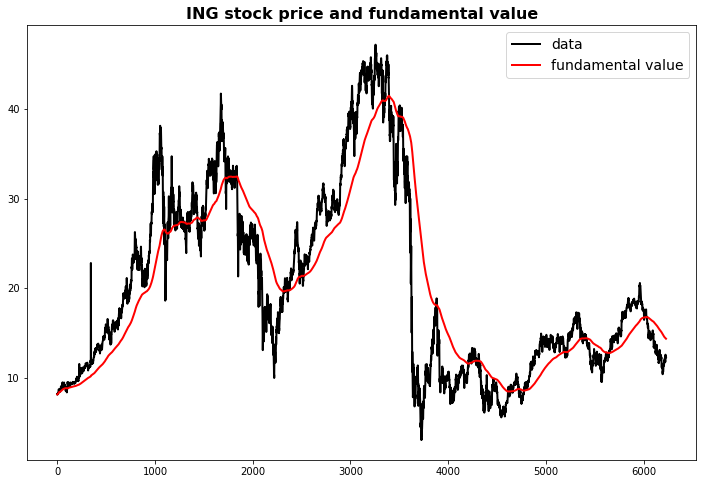

In [10]:
# 1.7
plt.figure(figsize=(12, 8))
plt.plot(y, color='k', linewidth=2, label='data')
plt.plot(xhat, color='r', linewidth=2, label='fundamental value')
plt.title('ING stock price and fundamental value', fontsize=16, fontweight='bold')
plt.legend(fontsize=14)
plt.show()

## Exercise 2 - distinguishing between temporary and structural shocks

0. The data is already given by the vector y
1. Define the local level model with $\sigma_{\varepsilon} = 0.1$ and $\sigma_{\upsilon} = 0.1$, and initialize the `Kalman` class with flat prior, i.e. $\hat{x} = 0$ and $\Sigma = 10^7$
2. Write a for loop to estimate the underlying state using the `Kalman.update` method, and plot the result
3. Play around with the signal-to-noise ratio, i.e. the ratio $\frac{\sigma_{\upsilon}}{\sigma_{\varepsilon}}$, and try to understand the consequences on the learning speed

In [11]:
# creating data
y = np.ones((20, 1))
y[12:20] = 1.2
np.random.seed(127)
y += np.random.randn(20, 1) * 0.01  # add some noise

In [12]:
# 2.1
A, C, G, H = 1, 0.1, 1, 0.2
ssm = LinearStateSpace(A, C, G, H)

In [13]:
kalman = Kalman(ssm, 0, 10^7)
kalman

Kalman filter:
  - dimension of state space          : 1
  - dimension of observation equation : 1

In [14]:
# 2.2
xhat = np.zeros(len(y))
for t in range(len(y)):
    kalman.update(y[t])
    xhat[t] = kalman.x_hat

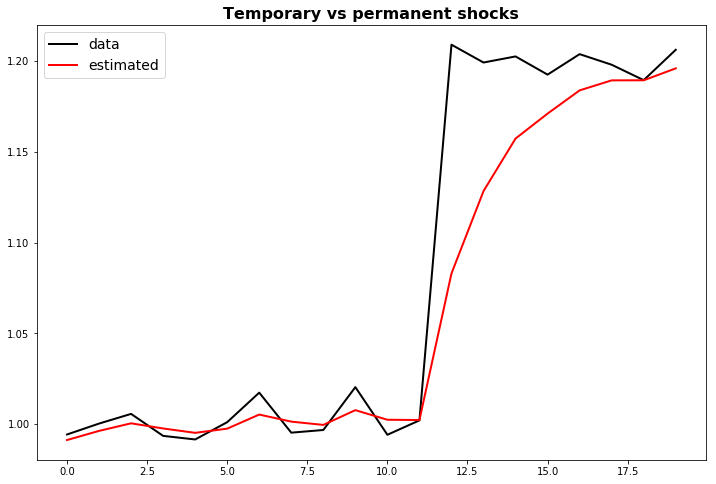

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(y, color='k', linewidth=2, label='data')
plt.plot(xhat, color='r', linewidth=2, label='estimated')
plt.title('Temporary vs permanent shocks', fontsize=16, fontweight='bold')
plt.legend(fontsize=14)
plt.show()

## Bonus exercise for the techies

1. Derive the formulae for the filtering step (use the well-known matching coefficients trick to combine two Gaussian densities)
2. If you successfully finished the derivations for the filtering step, it should be relatively straightforward to derive the formulae for the prediction step